In [1]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer # 处理缺失值
data = pd.read_csv('model data final.csv')
data.set_index('Day',inplace=True)
stock = data
stock.drop(['Year','Season','Month','GDP Season','Close'],axis=1,inplace=True)
stock

,Day_Num,Volume,C1,C2,G,NX(yi mei yuan),ISM,new_cases,new_deaths,GDP_per_day
Day,,,,,,,,,,
2015/1/2,42006,76270000,-15.776760,4.915455,1214.892,-435.9,55.1,0.0,0.0,2.610000e+11
2015/1/5,42009,116160000,-16.496330,5.167977,1214.892,-435.9,55.1,0.0,0.0,2.680000e+11
2015/1/6,42010,101870000,-16.548551,5.513747,1214.892,-435.9,55.1,0.0,0.0,2.650000e+11
2015/1/7,42011,91030000,-13.489590,4.621326,1214.892,-435.9,55.1,0.0,0.0,2.680000e+11
2015/1/8,42012,114890000,-10.824681,4.108397,1214.892,-435.9,55.1,0.0,0.0,2.670000e+11
...,...,...,...,...,...,...,...,...,...,...
2020/11/19,44154,331330000,82.301354,11.495220,NaN,NaN,59.3,187963.0,1987.0,NaN
2020/11/20,44155,305350000,80.881013,11.196589,NaN,NaN,59.3,196010.0,1917.0,NaN
2020/11/23,44158,387200000,80.875876,11.488299,NaN,NaN,59.3,171462.0,913.0,NaN


In [2]:

stock = stock[pd.isnull(stock['GDP_per_day']) == False]
# fill the missing value 
imputer = SimpleImputer(missing_values= np.NaN , strategy= 'mean')
var_data = imputer.fit_transform(stock)
var_data = pd.DataFrame(var_data)
var_data.columns = stock.columns
var_data.index = stock.index
stock = var_data
stock

,Day_Num,Volume,C1,C2,G,NX(yi mei yuan),ISM,new_cases,new_deaths,GDP_per_day
Day,,,,,,,,,,
2015/1/2,42006.0,76270000.0,-15.776760,4.915455,1214.892,-435.9,55.1,0.0,0.0,2.610000e+11
2015/1/5,42009.0,116160000.0,-16.496330,5.167977,1214.892,-435.9,55.1,0.0,0.0,2.680000e+11
2015/1/6,42010.0,101870000.0,-16.548551,5.513747,1214.892,-435.9,55.1,0.0,0.0,2.650000e+11
2015/1/7,42011.0,91030000.0,-13.489590,4.621326,1214.892,-435.9,55.1,0.0,0.0,2.680000e+11
2015/1/8,42012.0,114890000.0,-10.824681,4.108397,1214.892,-435.9,55.1,0.0,0.0,2.670000e+11
...,...,...,...,...,...,...,...,...,...,...
2020/9/24,44098.0,447810000.0,64.563046,13.269579,1486.802,-638.6,56.0,45710.0,917.0,2.650000e+11
2020/9/25,44099.0,388900000.0,66.198872,12.520866,1486.802,-638.6,56.0,48077.0,939.0,2.710000e+11
2020/9/28,44102.0,401860000.0,68.371392,10.402967,1486.802,-638.6,56.0,32248.0,321.0,2.650000e+11


In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier  # 随机森林API
from xgboost import XGBRegressor
import lightgbm as lgb
clf1 = GradientBoostingRegressor(loss="ls", n_estimators=1000, max_depth=7)
clf2 = lgb.LGBMRegressor()
clf3 = LinearRegression()
clf4 = XGBRegressor()

In [4]:
X = stock.drop('GDP_per_day',axis=1)
y = stock['GDP_per_day']
train_num = 1200

x_train = X[:train_num]
x_test = X[train_num:]
y_train = y[:train_num]
y_test = y[train_num:]

from sklearn.preprocessing import StandardScaler


# # 标准化数据
# x_train = StandardScaler().fit_transform(x_train)
# x_test = StandardScaler().fit(x_train).transform(x_test)



# scaler = StandardScaler().fit(pd.DataFrame(y_train))
# y_train = scaler.transform(pd.DataFrame(y_train))

In [5]:
"""fit model"""
model = clf1.fit(x_train, y_train)
pred = model.predict(x_test)
# # 反归一化
# pred = scaler.inverse_transform(pred)
# # y_test = scaler.inverse_transform(y_test.values.reshape(-1,1))
model.score(x_test,y_test)

-0.21397847586984042

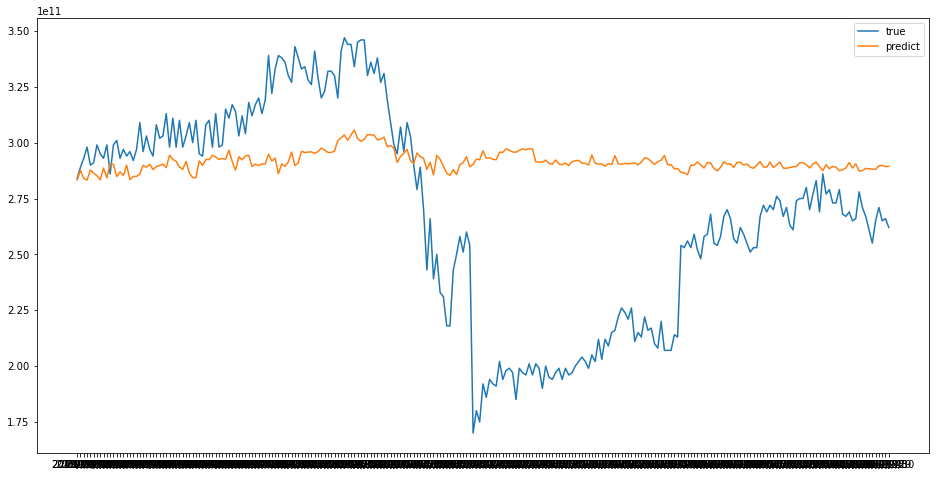

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
dict_data = {
    'Predictions': pred,
    'GDP_per_day': y_test
}
data_pd = pd.DataFrame(dict_data)


plt.plot(data_pd['GDP_per_day'],label = 'true')
plt.plot(data_pd['Predictions'],label = 'predict')

# plt.xticks(data_pd.index[::30],stock[train_num:].index[::30])
plt.legend()
plt.show()

In [7]:
####加权最小二乘估计
# The cell may no be excuted
# For every cycle,  reset dataset--(X,Y) and process them as a format readable by specified algprithm
XGB_train, _ = predict(model, x_train, y_train)
#_, LSTM_train = main()
#_, _, RF_train = train(x_train, x_test, y_train, y_test)
#train_target = y_train

# create dataset for linear regression
multi_train = np.zeros([len(XGB_train),3])
for i in range(len(XGB_train)):
    for j in range(3):
        if j == 0:
            mult_train[i][j] = LSTM_train[i]
        elif j == 1:
            mult_train[i][j] = XGB_train[i]
        else:
            mult_train[i][j] = LGB_train[i]

NameError: name 'predict' is not defined